In [1]:
import HNLCalc
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
hnl = HNLCalc.HeavyNeutralLepton(ve=1, vmu=1, vtau=1)

masses =  np.logspace(-1,1, 401)

## HNL Decay

In [3]:
hnl.get_br_and_ctau(mpts = masses)

In [4]:
print(f"Active Decay Modes:\n")
for channel in hnl.modes_active.keys():
    string = ""
    if channel not in ['nuqq','lud']:   
        for mode in hnl.modes_active[channel]:
            string += f" {mode},"
        print(f"{channel}: "+string[:-1]+"\n")        

Active Decay Modes:

null:  ('nu', 'e', 'anti_e'), ('nu', 'mu', 'anti_mu'), ('nu', 'tau', 'anti_tau')

llnu:  ('e', 'anti_mu', 'nu'), ('mu', 'anti_e', 'nu'), ('e', 'anti_tau', 'nu'), ('tau', 'anti_e', 'nu'), ('mu', 'anti_tau', 'nu'), ('tau', 'anti_mu', 'nu')

nu3:  ('nu', 'nu', 'nu')

nuP:  ('nu', 'pi0'), ('nu', 'eta'), ('nu', 'etap')

lP:  ('e', 'pi+'), ('anti_e', 'anti_pi+'), ('e', 'K+'), ('anti_e', 'anti_K+'), ('e', 'D+'), ('anti_e', 'anti_D+'), ('e', 'Ds+'), ('anti_e', 'anti_Ds+'), ('mu', 'pi+'), ('anti_mu', 'anti_pi+'), ('mu', 'K+'), ('anti_mu', 'anti_K+'), ('mu', 'D+'), ('anti_mu', 'anti_D+'), ('mu', 'Ds+'), ('anti_mu', 'anti_Ds+'), ('tau', 'pi+'), ('anti_tau', 'anti_pi+'), ('tau', 'K+'), ('anti_tau', 'anti_K+'), ('tau', 'D+'), ('anti_tau', 'anti_D+'), ('tau', 'Ds+'), ('anti_tau', 'anti_Ds+')

nuV:  ('nu', 'rho0'), ('nu', 'omega'), ('nu', 'phi')

lV:  ('e', 'rho+'), ('anti_e', 'anti_rho+'), ('e', 'K+star'), ('anti_e', 'anti_K+star'), ('mu', 'rho+'), ('anti_mu', 'anti_rho+'), ('mu

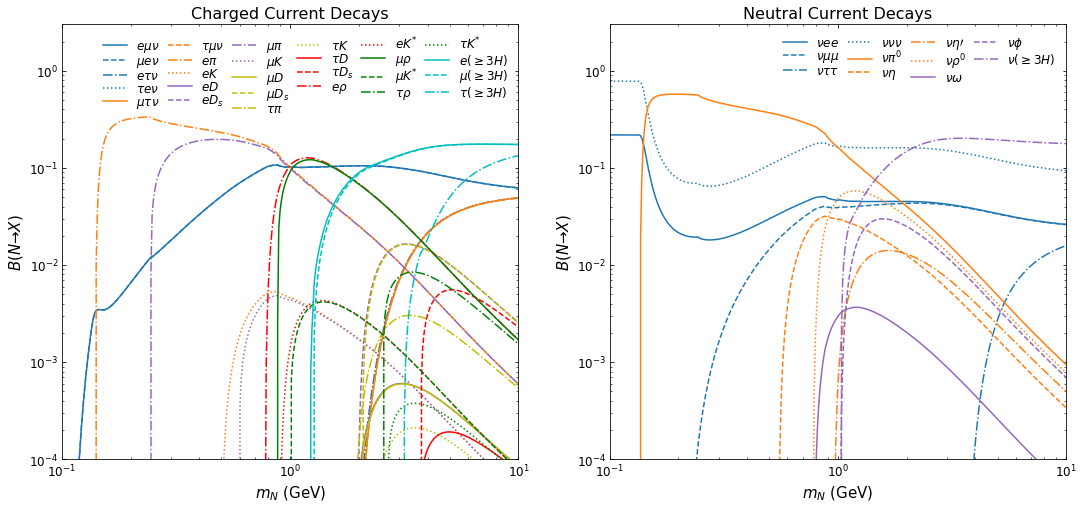

In [20]:
fig,(ax,ax1) = plt.subplots(1,2)

custom_cycler = (cycler(color=['tab:blue','tab:orange','tab:purple', 'y', 'r','green','c'])* 
                 cycler(ls=['-', '--', '-.', 'dotted']))

ax.set_prop_cycle(custom_cycler)
ax1.set_prop_cycle(custom_cycler)

fig.set_size_inches(18,8, forward=True)

ax.set_title(r"Charged Current Decays",fontsize = 16)
ax1.set_title(r"Neutral Current Decays",fontsize = 16)

for a in [ax,ax1]:
    
    a.set(xscale = 'log', yscale = 'log',xlim=(1e-1,1e1),ylim = (1e-4,3))
   
    a.tick_params(axis='both', which='major',direction='in',top=True,right=True)
    
    a.tick_params(axis='both', which='minor',direction='in',top=True,right=True)
    
    a.set_xlabel(r"$m_N$ (GeV)",fontsize=15)
    a.set_ylabel(r"$B(N\to X)$",fontsize=15)
    a.tick_params(axis='x', labelsize=12)
    a.tick_params(axis='y', labelsize=12)
    
for channel in ['null','nu3','nuP','nuV','nuhad']:
    for mode in hnl.modes_active[channel]:
        label = r"" 
        for p in mode: label += HNLCalc.plot_labels_neut[p]
        ax1.plot(masses,hnl.model_brs[channel][mode], label =label)


for channel in ['llnu','lP','lV','lhad']:
    for mode in hnl.modes_active[channel]:
        if 'anti_' not in mode[0]:
            label = r"" 
            for p in mode: label += HNLCalc.plot_labels_neut[p]
            ax.plot(masses,2*np.array(hnl.model_brs[channel][mode]), label =label)

ax.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=6,labelspacing=0,columnspacing = .65)
ax1.legend(prop={'size': 12},loc='upper right',frameon=False,ncol=4,labelspacing=0,columnspacing = .65)



fig.savefig(f'HNL Decay Br.pdf',format='pdf',bbox_inches='tight')